In [2]:
from scipy import io
from numpy.linalg import norm
import numpy as np
from __future__ import print_function

def load_data_noPreprocessing_MS2(lay1Len,lay2Len,lay3Len,lay4Len):
    #Loads MatLab file into var
    m = io.loadmat("T.mat")

    #set up the layer combos
    layers = [[],[],[],[],[]]
    for i in range(lay1Len):
        layers[0].append([1000])
    for i in range(lay2Len):
        layers[1].append([2000])
    for i in range(lay3Len):
        layers[2].append([3000])
    for i in range(lay4Len):
        layers[3].append([4000])
    for i in range(300):
        layers[4].append([5000])
    print(layers)
    
    for i in range(len(m['T'][0])):
        theseInodes = m['T'][0][i][0][0][2]
        position = m['T'][0][i][0][0][1][0][0]
        thisLayer = m['T'][0][i][0][0][0][0][0]
        newInodes = []
        for j in range(len(theseInodes)):
            newInodes.append(theseInodes[j][0])

        layers[thisLayer-1][position-1] = newInodes
        
    return layers


########################################################################################################
###THIS APPEARS TO BE A BUG. THE SUMMATION OF LAYER LENGTHS DOES NOT! EQUAL THE TOTAL NUMBER OF NODES###
###                              DOES NOT! HAVE THE CORRECT NUMBER OF LAYERS EITHER!                 ###
########################################################################################################
#Hard coding lengths should be removed    
layers = load_data_noPreprocessing_MS2(4,6,11,50)
#Var to hold all of the paths for later display. No function other than displaying data
allPaths = []

def getChildren(path,index,currentLayer,layers):
    #If the current layer is 4, return all of the possible paths.
    if (index>= len(layers[currentLayer])): return

    inodes = layers[currentLayer][index]
    
    if currentLayer == 4  and max(inodes) < 500:
        paths = []
        for i in range(len(inodes)):
            thisPath = path[:]
            thisPath.append(inodes[i])
            
            allPaths.append(thisPath)
            print("\t\t\t\tPATH",thisPath)
            
    #otherwise, continue to the next layer:
    else:
        if currentLayer == 0 and max(inodes) < 500:
            print("firstlayer:",index+1,inodes)
        if currentLayer == 1 and max(inodes) < 500:
            print("\tsecondlayer:",index+1,inodes)
        if currentLayer == 2 and max(inodes) < 500:
            print("\t\tthirdlayer:",index+1,inodes)
        if currentLayer == 3 and max(inodes) < 500:
            print("\t\t\tfourthlayer:",index+1,inodes)
        for i in range(len(inodes)):
            if inodes[i] < 500:
                newPath = path[:]
                newPath.append(inodes[i])
                getChildren(newPath,inodes[i]-1,currentLayer +1,layers)
 
#Just Used to display data
print("\n\n")
getChildren([1],0,0,layers)
print("---------------")
getChildren([2],1,0,layers)
print("---------------")
getChildren([3],2,0,layers)
print("---------------")
getChildren([4],3,0,layers)
#print(len(allPaths))
for i in range(len(allPaths)):
    print("Path",i,allPaths[i])
#4,4,11,12,57

[[[1000], [1000], [1000], [1000]], [[2000], [2000], [2000], [2000], [2000], [2000]], [[3000], [3000], [3000], [3000], [3000], [3000], [3000], [3000], [3000], [3000], [3000]], [[4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000], [4000]], [[5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000], [5000]

				PATH [2, 5, 5, 8, 54, 59]
				PATH [2, 5, 5, 8, 54, 82]
			fourthlayer: 45 [38, 45, 68]
				PATH [2, 5, 5, 45, 38, 19]
				PATH [2, 5, 5, 45, 38, 80]
---------------
firstlayer: 3 [1, 2, 3, 4, 5, 6]
	secondlayer: 1 [2, 6, 10, 11]
		thirdlayer: 2 [11, 25, 39, 42]
		thirdlayer: 6 [3, 8, 28, 30, 37, 40, 44]
			fourthlayer: 3 [56, 95]
				PATH [3, 1, 6, 3, 56, 26]
				PATH [3, 1, 6, 3, 56, 102]
				PATH [3, 1, 6, 3, 95, 68]
				PATH [3, 1, 6, 3, 95, 130]
				PATH [3, 1, 6, 3, 95, 141]
			fourthlayer: 8 [6, 54]
				PATH [3, 1, 6, 8, 54, 22]
				PATH [3, 1, 6, 8, 54, 46]
				PATH [3, 1, 6, 8, 54, 59]
				PATH [3, 1, 6, 8, 54, 82]
			fourthlayer: 28 [84, 86]
				PATH [3, 1, 6, 28, 84, 115]
				PATH [3, 1, 6, 28, 84, 175]
				PATH [3, 1, 6, 28, 86, 102]
				PATH [3, 1, 6, 28, 86, 106]
		thirdlayer: 10 [2, 3, 10, 19, 20, 29, 31, 34]
			fourthlayer: 3 [56, 95]
				PATH [3, 1, 10, 3, 56, 26]
				PATH [3, 1, 10, 3, 56, 102]
				PATH [3, 1, 10, 3, 95, 68]
				PATH [3, 1, 10, 3, 95, 130]
				PAT

Path 188 [3, 1, 10, 20, 56, 102]
Path 189 [3, 1, 11, 8, 54, 22]
Path 190 [3, 1, 11, 8, 54, 46]
Path 191 [3, 1, 11, 8, 54, 59]
Path 192 [3, 1, 11, 8, 54, 82]
Path 193 [3, 2, 1, 45, 38, 19]
Path 194 [3, 2, 1, 45, 38, 80]
Path 195 [3, 2, 4, 3, 56, 26]
Path 196 [3, 2, 4, 3, 56, 102]
Path 197 [3, 2, 4, 3, 95, 68]
Path 198 [3, 2, 4, 3, 95, 130]
Path 199 [3, 2, 4, 3, 95, 141]
Path 200 [3, 2, 11, 8, 54, 22]
Path 201 [3, 2, 11, 8, 54, 46]
Path 202 [3, 2, 11, 8, 54, 59]
Path 203 [3, 2, 11, 8, 54, 82]
Path 204 [3, 4, 3, 3, 56, 26]
Path 205 [3, 4, 3, 3, 56, 102]
Path 206 [3, 4, 3, 3, 95, 68]
Path 207 [3, 4, 3, 3, 95, 130]
Path 208 [3, 4, 3, 3, 95, 141]
Path 209 [3, 4, 3, 24, 20, 94]
Path 210 [3, 4, 3, 24, 20, 174]
Path 211 [3, 4, 3, 24, 20, 177]
Path 212 [3, 4, 3, 24, 39, 97]
Path 213 [3, 4, 3, 24, 39, 98]
Path 214 [3, 4, 3, 24, 39, 179]
Path 215 [3, 4, 6, 3, 56, 26]
Path 216 [3, 4, 6, 3, 56, 102]
Path 217 [3, 4, 6, 3, 95, 68]
Path 218 [3, 4, 6, 3, 95, 130]
Path 219 [3, 4, 6, 3, 95, 141]
Path 220 

In [2]:
from ete3 import Tree, TreeStyle
t = Tree()
#t = Tree( "((a,b),c);" )
t = Tree( "(((22,46,59,82),(22,46,59,82)),4);" )
#t.populate(10)
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
t.show(tree_style=ts)

ImportError: No module named ete3

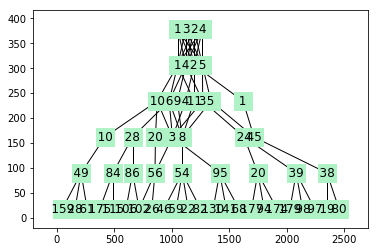

In [2]:
-

In [1]:
###This is a mostly identical copy of the orginal code
###Changes have been made to read in "Test" file to verify code 
###The "Test" file is restricted to the hard coded values origally supplied
###ie. layer number and layer lengths

from scipy import io
from numpy.linalg import norm
import numpy as np
from __future__ import print_function


MATLAB_OFFSET = 1

'''
Returns a ndarray of node data
'''
def access_node_data(file_name, node):

  file_with_extension = file_name + '.mat'
  var = io.loadmat(file_with_extension, squeeze_me=True)
  data = var[file_name][node - MATLAB_OFFSET]
  return data

'''
Returns array of child nodes for a node
'''
def get_child_nodes(file_name, node):
  node_data = access_node_data(file_name, node)
  a = node_data.tolist()
  arr = []
  for val in a[2]:
    arr.append(val)
  return arr

'''
Returns actual node value
'''
def get_current_node(file_name, node):
  node_data = access_node_data(file_name, node)
  a = node_data.tolist()
  return a[1]

'''
Returns dictionary layers and their lengths
'''
def get_layer_lens(file_name):
  layer_dict = {}
  for i in range(total_nodes(file_name)):
    data = access_node_data(file_name, i)
    layer = get_layer_of_node(data)
    if layer in layer_dict:
      layer_dict[layer] += 1
    else:
      layer_dict[layer] = 1
  return layer_dict

'''
Returns the layer number of the node
'''
def get_layer_of_node(node_data):
  a = node_data.tolist()
  return a[0]

'''
Gets the total number of nodes in the matlab file
'''
def total_nodes(file_name): #Do not include .mat extension
    file_with_extension = file_name + '.mat'
    var = io.loadmat(file_with_extension, squeeze_me=True)
    return len(var[file_name])



def load_data_noPreprocessing_MS2(lay1Len,lay2Len,lay3Len,lay4Len):
    #set up the layer combos
    layers = [[],[],[],[],[]]
    for i in range(lay1Len):
        layers[0].append([1000])
    for i in range(lay2Len):
        layers[1].append([2000])
    for i in range(lay3Len):
        layers[2].append([3000])
    for i in range(lay4Len):
        layers[3].append([4000])
    for i in range(300):
        layers[4].append([5000])
    
    for i in range(MATLAB_OFFSET, total_nodes('T') + MATLAB_OFFSET):
        theseInodes = get_child_nodes('T', i)
        position = get_current_node('T', i)
        thisLayer = get_layer_of_node(access_node_data('T', i))
        layers[thisLayer-1][position-1] = theseInodes
    return layers

########################################################################################################
###THIS APPEARS TO BE A BUG. THE SUMMATION OF LAYER LENGTHS DOES NOT! EQUAL THE TOTAL NUMBER OF NODES###
###                              DOES NOT! HAVE THE CORRECT NUMBER OF LAYERS EITHER!                 ###
########################################################################################################
#Hard coding lengths should be removed
layers = load_data_noPreprocessing_MS2(4,6,11,50)
#layers = load_data_noPreprocessing_MS2(4,11,12,57)


#Var to hold all of the paths for later display. No function other than displaying data
allPaths = []

def getChildren(path,index,currentLayer,layers):
    #If the current layer is 4, return all of the possible paths.
    if (index>= len(layers[currentLayer])): return

    inodes = layers[currentLayer][index]
    
    if currentLayer == 4  and max(inodes) < 500:
        paths = []
        for i in range(len(inodes)):
            thisPath = path[:]
            thisPath.append(inodes[i])
            
            allPaths.append(thisPath)
            print("\t\t\t\tPATH",thisPath)
            
    #otherwise, continue to the next layer:
    else:
        if currentLayer == 0 and max(inodes) < 500:
            print("firstlayer:",index+1,inodes)
        if currentLayer == 1 and max(inodes) < 500:
            print("\tsecondlayer:",index+1,inodes)
        if currentLayer == 2 and max(inodes) < 500:
            print("\t\tthirdlayer:",index+1,inodes)
        if currentLayer == 3 and max(inodes) < 500:
            print("\t\t\tfourthlayer:",index+1,inodes)
        for i in range(len(inodes)):
            if inodes[i] < 500:
                newPath = path[:]
                newPath.append(inodes[i])
                getChildren(newPath,inodes[i]-1,currentLayer +1,layers)
 
#Just used to display data
print("\n\n")
getChildren([1],0,0,layers)
print("---------------")
getChildren([2],1,0,layers)
print("---------------")
getChildren([3],2,0,layers)
print("---------------")
getChildren([4],3,0,layers)

#Prints list of all paths
for i in range(len(allPaths)):
    print("Path",i,allPaths[i])




firstlayer: 1 [1, 2, 3, 4, 5, 6]
	secondlayer: 1 [2, 6, 10, 11]
		thirdlayer: 2 [11, 25, 39, 42]
		thirdlayer: 6 [3, 8, 28, 30, 37, 40, 44]
			fourthlayer: 3 [56, 95]
				PATH [1, 1, 6, 3, 56, 26]
				PATH [1, 1, 6, 3, 56, 102]
				PATH [1, 1, 6, 3, 95, 68]
				PATH [1, 1, 6, 3, 95, 130]
				PATH [1, 1, 6, 3, 95, 141]
			fourthlayer: 8 [6, 54]
				PATH [1, 1, 6, 8, 54, 22]
				PATH [1, 1, 6, 8, 54, 46]
				PATH [1, 1, 6, 8, 54, 59]
				PATH [1, 1, 6, 8, 54, 82]
			fourthlayer: 28 [84, 86]
				PATH [1, 1, 6, 28, 84, 115]
				PATH [1, 1, 6, 28, 84, 175]
				PATH [1, 1, 6, 28, 86, 102]
				PATH [1, 1, 6, 28, 86, 106]
		thirdlayer: 10 [2, 3, 10, 19, 20, 29, 31, 34]
			fourthlayer: 3 [56, 95]
				PATH [1, 1, 10, 3, 56, 26]
				PATH [1, 1, 10, 3, 56, 102]
				PATH [1, 1, 10, 3, 95, 68]
				PATH [1, 1, 10, 3, 95, 130]
				PATH [1, 1, 10, 3, 95, 141]
			fourthlayer: 10 [41, 49]
				PATH [1, 1, 10, 10, 49, 28]
				PATH [1, 1, 10, 10, 49, 61]
				PATH [1, 1, 10, 10, 49, 159]
			fourthlayer: 2

			fourthlayer: 3 [56, 95]
				PATH [3, 2, 4, 3, 56, 26]
				PATH [3, 2, 4, 3, 56, 102]
				PATH [3, 2, 4, 3, 95, 68]
				PATH [3, 2, 4, 3, 95, 130]
				PATH [3, 2, 4, 3, 95, 141]
		thirdlayer: 11 [8, 30, 38, 50]
			fourthlayer: 8 [6, 54]
				PATH [3, 2, 11, 8, 54, 22]
				PATH [3, 2, 11, 8, 54, 46]
				PATH [3, 2, 11, 8, 54, 59]
				PATH [3, 2, 11, 8, 54, 82]
			fourthlayer: 50 [45, 69]
	secondlayer: 4 [2, 3, 6, 9]
		thirdlayer: 2 [11, 25, 39, 42]
		thirdlayer: 3 [3, 6, 23, 24, 25, 32, 47]
			fourthlayer: 3 [56, 95]
				PATH [3, 4, 3, 3, 56, 26]
				PATH [3, 4, 3, 3, 56, 102]
				PATH [3, 4, 3, 3, 95, 68]
				PATH [3, 4, 3, 3, 95, 130]
				PATH [3, 4, 3, 3, 95, 141]
			fourthlayer: 24 [20, 39]
				PATH [3, 4, 3, 24, 20, 94]
				PATH [3, 4, 3, 24, 20, 174]
				PATH [3, 4, 3, 24, 20, 177]
				PATH [3, 4, 3, 24, 39, 97]
				PATH [3, 4, 3, 24, 39, 98]
				PATH [3, 4, 3, 24, 39, 179]
		thirdlayer: 6 [3, 8, 28, 30, 37, 40, 44]
			fourthlayer: 3 [56, 95]
				PATH [3, 4, 6, 3, 56, 26]
				PAT

In [ ]:
# This is an object based implementation.
# It needs to have all methods be tested.
# Method implementation not all that different than above, but has new names and needs to be verified

from scipy import io

class MatlabConnectome:

  MATLAB_OFFSET = 1

  '''
  Constructor taking file name and variable inside file to be processed
  '''
  def __init__(self, file_name, var_name):
    self.file_name = file_name
    self.var_name = var_name
    self.all_paths = []

  def print_all_path(self):
    for i in range(len(self.get_all_paths())):
        print("Path",i,self.get_all_paths()[i])
  
  '''
  Returns a ndarray of node data
  '''
  def node_data(self, node):
    var = io.loadmat(self.file_name, squeeze_me=True)
    data = var[self.var_name][node - MatlabConnectome.MATLAB_OFFSET]
    return data

  '''
  Returns all_paths
  '''
  def get_all_paths(self):
    return self.all_paths

  '''
  Returns array of child nodes for a node
  '''
  def child_nodes(self, node):
    node_data = self.node_data(node)
    a = node_data.tolist()
    arr = []
    for val in a[2]:
      arr.append(val)
    return arr

  '''
  Returns actual node value
  '''
  def current_node(self, node):
    node_data = self.node_data(node)
    a = node_data.tolist()
    return a[1]

  '''
  Returns file name
  '''
  def get_file(self):
    return self.file_name

  '''
  Returns dictionary layers and their lengths
  '''
  def layer_lens(self):
    layer_dict = {}
    for i in range(self.total_nodes()):
      data = self.node_data(i)
      layer = self.layer_of_node(data)
      if layer in layer_dict:
        layer_dict[layer] += 1
      else:
        layer_dict[layer] = 1
    return layer_dict

  '''
  Returns the layer number of the node
  '''
  def layer_of_node(self, node_data):
    a = node_data.tolist()
    return a[0]

  '''
  Gets the total number of nodes in the matlab file
  '''
  def total_nodes(self):
      var = io.loadmat(self.file_name, squeeze_me=True)
      return len(var[self.var_name])

  #############################
  ###     Matt's Methods    ###
  #############################

  def load_data_noPreprocessing_MS2(self, lay1Len, lay2Len, lay3Len, lay4Len):
    #My Code
    '''
    layer_lens = self.layer_lens()
    print(layer_lens[1])
    layers = []
    for i in range(len(layer_lens)):
      layers.append([])

    for i in range(len(layer_lens)):
      print(i)
      print("Layer " + str(layer_lens[i + 1]))
      for j in range(layer_lens[i+1] + 1):
        layers[i].append([1000 * i])
    print(layers)
    '''
        
    layers = [[],[],[],[],[]]
    for i in range(lay1Len):
      layers[0].append([1000])
    for i in range(lay2Len):
      layers[1].append([2000])
    for i in range(lay3Len):
      layers[2].append([3000])
    for i in range(lay4Len):
      layers[3].append([4000])
    for i in range(300):
      layers[4].append([5000])

    for i in range(MatlabConnectome.MATLAB_OFFSET, self.total_nodes() + MatlabConnectome.MATLAB_OFFSET):
      these_inodes = self.child_nodes(i)
      position = self.current_node(i)
      this_layer = self.layer_of_node(self.node_data(i))
      layers[this_layer-1][position-1] = these_inodes
    return layers


  def getChildren(self, path, index, currentLayer, layers):
    #If the current layer is 4, return all of the possible paths.
    if (index>= len(layers[currentLayer])): return

    inodes = layers[currentLayer][index]
        
    if currentLayer == 4 and max(inodes) < 500:
      paths = []
      for i in range(len(inodes)):
        thisPath = path[:]
        thisPath.append(inodes[i])

        self.all_paths.append(thisPath)
        print("\t\t\t\tPATH",thisPath)
                                                                         
  #otherwise, continue to the next layer:
    else:
      if currentLayer == 0 and max(inodes) < 500:
        print("firstlayer:",index+1,inodes)
      if currentLayer == 1 and max(inodes) < 500:
        print("\tsecondlayer:",index+1,inodes)
      if currentLayer == 2 and max(inodes) < 500:
        print("\t\tthirdlayer:",index+1,inodes)
      if currentLayer == 3 and max(inodes) < 500:
        print("\t\t\tfourthlayer:",index+1,inodes)
      for i in range(len(inodes)):
        if inodes[i] < 500:
          newPath = path[:]
          newPath.append(inodes[i])
          self.getChildren(newPath,inodes[i]-1,currentLayer +1,layers)

  '''
  Returns variable name
  '''
  def get_var(self):
    return self.var_name



########################
########TESTING#########
########################

t_obj = MatlabConnectome("T.mat", "T")
#num_data = t_obj.node_data(88)
#num = t_obj.layer_of_node(num_data)
#t_obj.print_a_path()

#print(num)
#Mine
#layers = t_obj.load_data_noPreprocessing_MS2(6,11,16,21)
#Matts
layers = t_obj.load_data_noPreprocessing_MS2(4,6,11,50)

print("\n\n")
t_obj.getChildren([1],0,0,layers)
print("---------------")
t_obj.getChildren([2],1,0,layers)
print("---------------")
t_obj.getChildren([3],2,0,layers)
print("---------------")
t_obj.getChildren([4],3,0,layers)

#Prints list of all paths
t_obj.print_all_path()